# Final Exam - CS4414

# Student ID: 250901088 <font color = 'red'> (XXX / 120) </font>

## General comments 
This Final Exam integrates knowledge and skills acquired throughout the term, but focuses on the second half of the course. You are allowed to use any document and source on your computer and look up documents on the internet. **You or not allowed to share documents, or communicate in any other way with people inside or outside the classroom during the exam.** To finish the exam in the alloted 3 hrs, you will have to work efficiently. **Read the entirety of each question carefully. Note that several questions have coding parts and explanation parts.**

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

**You may add additional cells** if you want to try some things out for the questions, like examine data, etc. You don't need to do this to complete the exam but if it helps, go for it.

**You have 3 hours. You can submit many times before the end of the exam. I suggest you submit when you have finished, then again after you have checked it over.**

Good luck!

In [139]:
## Preliminaries
# Sets up the environment by importing packages

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols, logit
from statsmodels.stats.proportion import proportion_confint
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_classifier(cls, X, y):
    h = 0.02 # Mesh step size
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = cls.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, levels=20)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']),
               edgecolors='k')

# Q1 - Classification - 30 Marks

Consider the following data set and logistic regression analysis:

In [140]:
Q1df = pd.read_csv('./yeast.data',delim_whitespace=True,
                   header=None)
Q1df.columns=['Seq','mcg','gvh','alm','mit','erl','pox','vac','nuc','Class']
Q1df['Label'] = (Q1df['Class'] == "NUC").astype(int)
Q1dftrain, Q1dftest = train_test_split(Q1df, test_size=100, random_state=0)

lr_model = logit('Label ~ mcg + gvh + alm + mit + erl + vac',
          data=Q1dftrain).fit()

lr_model.summary2()

Optimization terminated successfully.
         Current function value: 0.539835
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.102     
Dependent Variable: Label            AIC:              1508.2623 
Date:               2019-12-16 16:45 BIC:              1544.8914 
No. Observations:   1384             Log-Likelihood:   -747.13   
Df Model:           6                LL-Null:          -832.16   
Df Residuals:       1377             LLR p-value:      4.3858e-34
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.1138    1.0719   0.1062  0.9154  -1.9870   2.2146
mcg           -2.6542    0.6141  -4.3217  0.0000  -3.8579  -1.4505
gvh           -1.9965    0.6617  -3.0173  0.0026  -3.2934  -0.6996
alm            5.1442    0.8216   6.2609  0.0000   3.5338   6.7546
mit           -2.9340    0.5467  -5.3664  0.0000  -4.0056  -1.8624
erl           -0.1850    1.4075  -0.1315  0.8954  -2.9438   2.5737
vac           -1.1366    1.0970  -1.0361  0.3002  -3.2867   1.0135
=================================================================

"""

## Q1.1 - Significance (XX / 10)

Answer the following **using complete sentences**.

Which of the predictors used in the model (if any) are statistically significantly associated with the class label? How do you know?

#### Your response: 
From this data, we perform 6 different predictors and if the predictors is statitstically signficant then it has to reject the null hypothesis for a given predictor. If we choose a p value cutoff of 5% which is 0.05, then we can see that all the predictors are statistically siginificant relationship to the response excpet for erl. 



## Q1.2 - Performance Evaluation - Accuracy (XX / 10)

Consider the following estimate of accuracy on the test set.

In [141]:
y_test = Q1dftest['Label']
y_test_pred = lr_model.predict(Q1dftest)
#Point estimate of test accuracy - 100 test points
y_test_binary_pred = (y_test_pred > 0.5).astype(int)
num_correct = (y_test_binary_pred == y_test).sum()
print(num_correct/100)

#Confidence interval
print(proportion_confint(num_correct,100))

0.71
(0.6210642720173202, 0.7989357279826798)


Answer the following **using complete sentences**.

Does the test accuracy above provide evidence that the logistic regression classifier has better generalization accuracy than a baseline classifier that always outputs class 1? *Explain* why or why not.

**Your response:**
In the test accuracy above that the test accuracy of the logistic regression classifier gives 0.71 and this shows that this logistic regression classifier is not better than the baseline classifier that always outputs class 1 since the test accuracy is lower than the generalization accuracy of a baseline classifer. 

## Q1.3 - Performance Evaluation - Other Metric (XX / 10)

Using the variables defined above, compute any other measure of classification performance that we discussed in class.

In [142]:
df = pd.get_dummies(Q1df,drop_first=True)

X = df.drop('Class', axis='columns').astype('int').values

y_test_pred_prob = lr_model.predict_proba(Xtest)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
sns.lineplot(fpr,tpr)

my_perf = auc(fpr,tpr)
print(f"My measure of performance: {my_perf}")

KeyError: "['Class'] not found in axis"

**Explain in a few sentences** what measure of performance you computed, and what the measurement tells you.

**Your response:**
I was going to measure the receiver operating characteristic(ROC) and AUC to measure the performance that I computed because AUC curve represents the degree of separability and ROC gives the probability curve. As we learned in the lecture, these curves is the measurment of the different threshold settings and by adjusting this, we can have different flase positive rates which gives the idea of true negatives/positives or fase negatives/positives.



# Q2 - Support Vector Machines - 20 Marks

Consider the following dataset:

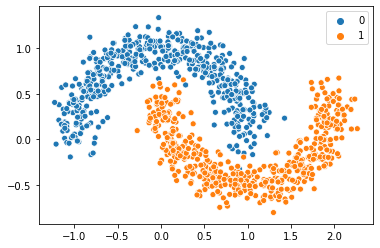

In [143]:
from sklearn import datasets
Q2X,Q2y = datasets.make_moons(1000, noise=0.125, random_state=0)
sns.scatterplot(x=Q2X[:,0],y=Q2X[:,1], hue=Q2y)
Q2Xtrain, Q2Xtest, Q2ytrain, Q2ytest = train_test_split(Q2X,Q2y, 
                                test_size=100, random_state=0)

Now, consider the following analysis which evaluates the application of Support Vector Machines to this dataset using cross validation on the training set: 

In [144]:
## Support Vector Machine Analysis

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, make_scorer, confusion_matrix

svc_pipe = Pipeline([
    ('SVC', SVC(kernel = 'linear') )
])

param_grid = {'SVC__C': np.linspace(1e-5, 1)}

svc_gscv = GridSearchCV(svc_pipe, 
                          param_grid=param_grid, 
                          cv = 10,
                          scoring=make_scorer(accuracy_score),
                          n_jobs=-1,
                          iid = True)

svc_gscv.fit(Q2Xtrain, Q2ytrain)
print(f"Highest CV accuracy found: {svc_gscv.best_score_}")

Highest CV accuracy found: 0.8722222222222222


## Q2.1 - Improve CV Accuracy (XX/10)

The cell below contains a copy of the analysis above. Improve the best CV accuracy found by the analysis by modifying the parameters passed to the `SVC` function through the pipeline and/or by modifying the definition of `param_grid`. You may wish to refer to the sklearn documentation. **Do not modify any other part of the code.** Note that there are several ways to accomplish this; all are acceptable and you only need to show one. Warnings are okay; errors are not. Note that you will need to explain and justify your modification in the next question.

In [145]:
## Support Vector Machine Analysis

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, make_scorer, confusion_matrix

## Edit this code to improve CV estimate of accuracy ##
svc_pipe = Pipeline([
    ('SVC', SVC(kernel = 'rbf') )
])

param_grid = {'SVC__C': np.linspace(1e-5, 1)}
########################################


svc_gscv = GridSearchCV(svc_pipe, 
                          param_grid=param_grid, 
                          cv = 10,
                          scoring=make_scorer(accuracy_score),
                          n_jobs=-1,
                          iid = True)

svc_gscv.fit(Q2Xtrain, Q2ytrain)
print(f"Highest CV accuracy found: {svc_gscv.best_score_}")

Highest CV accuracy found: 0.9855555555555555


/opt/tljh/user/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Q2.2 - Explain Improvement in CV Accuracy (XX/10)

**Using well-formed sentences**, explain how the modification you made to the code changes the analysis, and explain why the change resulted in higher CV accuracy. You may wish to explain this in terms of the properties of the dataset.

**Your response:**
From the above question, I modified the kernel = linear to kernel = rbf, kernel is mapping the non-linear separable data-set into a higher dimensional space where we can find a hyperplane that can separate the samples. There is a lot of parameter that can use for it such as linear, rbf, sigmoid, poly etc. I chose rbf because it showed the highest CV accuracy. With the linear we got 0.87.. however when we used rbf we got 0.985.. The change resulted in higher CV accuracy because since this datasets are useful for hyper plane and non-linear  and the graph shows that this is non-linear so this kernel parameter is useful.

# Q3 - Neural Networks - 20 Marks

Consider the following dataset:

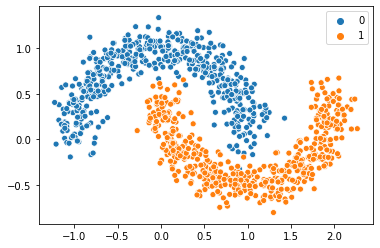

In [146]:
from sklearn import datasets
Q3X,Q3y = datasets.make_moons(1000, noise=0.125, random_state=0)
sns.scatterplot(x=Q3X[:,0],y=Q3X[:,1], hue=Q3y)
Q3Xtrain, Q3Xtest, Q3ytrain, Q3ytest = train_test_split(Q3X,Q3y, 
                                test_size=100, random_state=0)

Now, consider the following analysis which evaluates the application of Neural Networks to this dataset: 

0.86

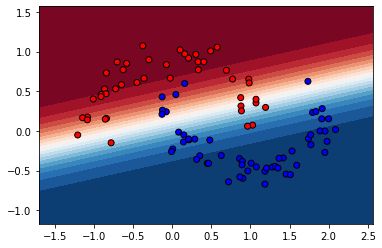

In [147]:
from sklearn.neural_network import MLPClassifier
    
nn = MLPClassifier(solver='lbfgs', activation='tanh', alpha=1e-5, 
                   hidden_layer_sizes=(1), random_state=0)
nn.fit(Q3Xtrain,Q3ytrain)

plot_classifier(nn,Q3Xtest,Q3ytest)

(nn.predict(Q3Xtest) == Q3ytest).mean()

## Q3.1 - Improve Test Accuracy (XX/10)

The cell below contains a copy of the analysis above. Improve the best test accuracy found by the analysis by modifying the parameters passed to the `MLPClassifier` function. **Do not modify any other part of the code.** You may wish to refer to the sklearn documentation. Note that there are several ways to accomplish this; all are acceptable and you only need to show one. Warnings are okay; errors are not. Note that you will need to explain and justify your modification in the next question.

0.99

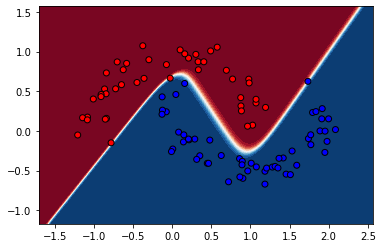

In [148]:
from sklearn.neural_network import MLPClassifier

## Edit this code to improve test set estimate of accuracy ##
nn = MLPClassifier(solver='lbfgs', activation='tanh', alpha=1e-5, 
                   hidden_layer_sizes=(5), random_state=0)
#####################

nn.fit(Q3Xtrain,Q3ytrain)

plot_classifier(nn,Q3Xtest,Q3ytest)

(nn.predict(Q3Xtest) == Q3ytest).mean()

## Q3.2 - Model Selection / Test Accuracy (XX/10)

Typically, we would not use the test set to do model selection. **Using a few well-formed sentences, explain why we do not usually do this.**

**Your response:**
There is some idea that we would not use the test set to do the model selection because choosing a variation of the model is training. And the definition of training set is the data set that which model we built. And if we modified using the parameter or if we chose best performing dataset then this does not mean that the set is test set because it got modified to training set. The test set will use after then evaluation or final evaluation to check how this will behave on that and compare it but it is not a good idea to use in the model selection. 






# Q4 - Distance-based Learning - 30 Marks

Consider the following dataset:

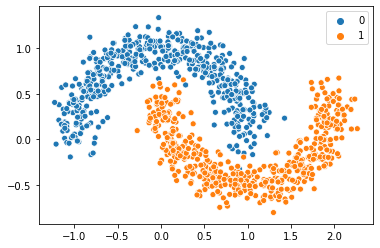

In [149]:
from sklearn import datasets
Q4X,Q4y = datasets.make_moons(1000, noise=0.125, random_state=0)
sns.scatterplot(x=Q4X[:,0],y=Q4X[:,1], hue=Q4y)
Q4Xtrain, Q4Xtest, Q4ytrain, Q4ytest = train_test_split(Q4X,Q4y, 
                                test_size=100, random_state=0)

Now, consider the following analysis which evaluates the application of K Nearest Neighbours to this dataset. *Note this cell may take a few seconds to run*: 

0.45

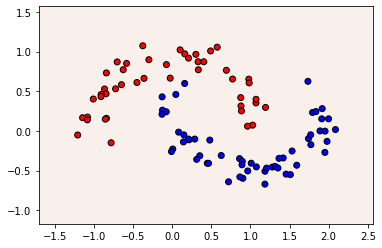

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(n_neighbors=900)

knnc.fit(Q4Xtrain,Q4ytrain)

plot_classifier(knnc,Q4Xtest,Q4ytest)

(knnc.predict(Q4Xtest) == Q4ytest).mean()

## Q4.1 - K nearest neighbours - Boundary (X/5)

**Explain in a few well-formed sentences why test accuracy is so poor.** Is the decision boundary too simple or too complex?
This shows that the test accuracy is so poor because we got 0.45. I believe that the decsion boundary is too simple for this dataset because the decision boundary is piecewise linear which is a hyperplane that is perpendicular to the bisector of pairs of points from different classes, however, in this knn, it has to be more complex since the graph is showing that there is some pattern for non-linear relationship.

## Q4.2 - K nearest neighbours - Improvement (X/5)

The cell below contains a copy of the analysis above. Improve the test accuracy found by the analysis by modifying the parameters passed to the KNeighborsClassifier function. Do not modify any other part of the code. You may wish to refer to the sklearn documentation. Note that there are several ways to accomplish this; all are acceptable and you only need to show one. Warnings are okay; errors are not. Note that you will need to explain your modification in the next question.

1.0

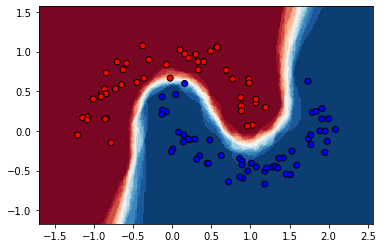

In [151]:
from sklearn.neighbors import KNeighborsClassifier

## Edit this code to improve test set estimate of accuracy ##
knnc = KNeighborsClassifier(n_neighbors=20)
#####################

knnc.fit(Q4Xtrain,Q4ytrain)

plot_classifier(knnc,Q4Xtest,Q4ytest)

(knnc.predict(Q4Xtest) == Q4ytest).mean()

## Q4.3 - Explain Improvement in Test Accuracy (XX/10)

**Using well-formed sentences,** explain how the modification you made to the code changes the analysis, and explain why the change resulted in higher test accuracy. You may wish to explain this in terms of the properties of the dataset.

**Your response:**
In the previous question, I modified the the parameters of n_neighbors which is number of neighbours and this changed result in higher test accuracy since tthe K nearest neighbours is not good at fitting of the large dimesional data so if we want to get the good test accuracy of higher test accuracy then we have to reduce the dimensions. 


## Q4.4 - Hierarchical clustering - (XX / 10)

Consider the clustering analysis below:

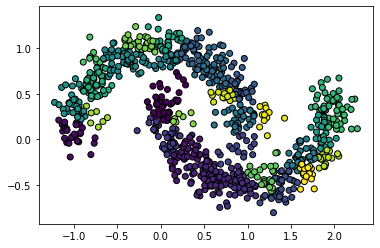

In [152]:
from sklearn.cluster import AgglomerativeClustering
clabels = AgglomerativeClustering(n_clusters=30, linkage='complete').fit_predict(Q4Xtrain)
plt.scatter(Q4Xtrain[:, 0], Q4Xtrain[:, 1], c=clabels, edgecolors='k')

What parameter choice resulted in the very differently-sized clusters? What could be changed to prevent this from happening? **Explain in a few well-formed sentences.**

**Your response:**

The parameter linkage ='single' give the result of very differently-sized clusters. There are ward, complete, average, single. And the purpose of this is determines which distance to use between sets of observation. Also, with the big number of clusters and the parameter ward,complete,average gives differently-sized clusters. For example, I subsituted the n_clusters as 30 and linkage = 'complete' this shows the different sized clusters and different clusters are gathering since the linkage ='complete' uses the maximum distances between all observations of the two sets and the number of clusters of 30 means they need to find 30 number of clusters.

To prevent this from happening, we need to find the clean data because this clustering method is sensitive in the noise and it will affect to the data that we want to use. We need to find the right parameter such as linkage because the linkage='complete' are not affected by the noise but it will have a bias towards the finding the global patterns.

# Q5 - Trees - 10 Marks

Consider the following dataset:

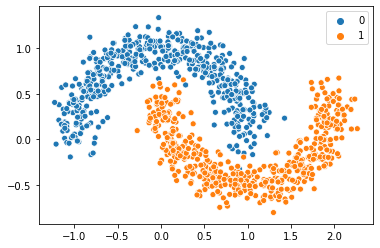

In [153]:
from sklearn import datasets
Q5X,Q5y = datasets.make_moons(1000, noise=0.125, random_state=0)
sns.scatterplot(x=Q5X[:,0],y=Q5X[:,1], hue=Q5y)
Q5Xtrain, Q5Xtest, Q5ytrain, Q5ytest = train_test_split(Q5X,Q5y, 
                                test_size=100, random_state=0)

Now consider the following two analyses:

0.99

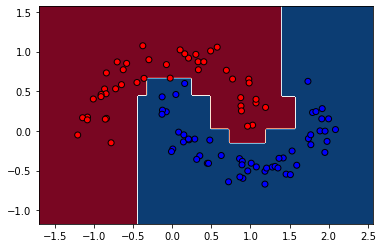

In [154]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(Q5Xtrain,Q5ytrain)

plot_classifier(dtc,Q5Xtest,Q5ytest)

(dtc.predict(Q5Xtest) == Q5ytest).mean()


0.99

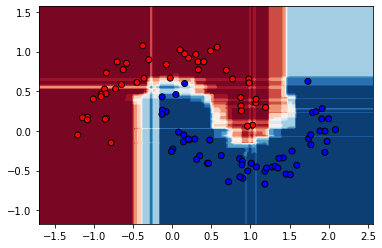

In [155]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(Q5Xtrain,Q5ytrain)

plot_classifier(rfc,Q5Xtest,Q5ytest)

(rfc.predict(Q5Xtest) == Q5ytest).mean()

## Q5.1 - Decision Trees vs. Random Forests (XX/10)

**In a few sentences, using the analyses above as examples, explain why the decision boundary for the decision tree and the random forest are similar. Then explain why they are different.**

**Your reponse:**

The decsion boundary for the decision tree and the random forest are similar as you can see in the graph above the questions. Because decision tree is a collection of variables and the random forest is a collection of a decision tree which tells that decision tree is a subset of the random forest.The main point that decision boundary for the decision tree and the random forest are similar is that the random forests use an ensemble of decision tree to make decisions. 

The deicsion tree and the random foreset is different because decision tree is on training set and it is more accurate, however, random forest is unexpected data and it is more accurate with it. Also, decision tree is a collection of variables or attributes or dataset but the random forest is a collection of decision tree which tells that decision tree is a subset of the random forest. The most important thing will be the decision tree is suffering from the overfitting but the random foreest prevents the overfitting.






# Q6 - Dimensionality Reduction - 10 Marks

## Q6.1 - Recommender Systems (XX/10)

Consider a data matrix `X` with `n` rows, each corresponding to a person, and `p` columns, each corresponding to a movie. The entry at row `i`, column `j` is `1` if person `i` has seen movie `j`, and `0` otherwise.

Suppose we wanted to compress this matrix with dimensionality reduction. Would you choose PCA or NMF for this matrix? **Give your choice, and justify it in a few sentences.**

**Your response:**
If we want to compress this matrix with dimensionality reduction I would choose PCA for this matrix. Although NMF is a good tool of compress this matrix but PCA used when we want to transform high dimensions into low dimensions. Also, PCA is useful for linearly separable data because NMF does not require any modifications of linear separability. The reason why I would choose PCA is useful when we have to build a geometrical separability between datas. However, NMF is more suits for image processing etc. 


Now suppose we have compressed `X` into the product of a tall, thin matrix `Z` and a short, wide matrix `V` transpose using the dimensionality reduction technique you chose. **In a few sentences each, in the context of the movie-watching example, explain the meaning** of the contents of the of columns of `Z` and **explain the meaning** of the contents of the rows of `V` transpose.

**Your response:**

The Z which is row - oriented shows how many people watched the movie so it counts the pepole and the short, wide matrix V will give the movie that people have watched and count it. 

# QBONUS - Fairness - 5 Marks

Suppose that you have computed that in order to estimate generalization performance with sufficient precision, a randomly drawn test set of size N will be required. Now suppose that your colleague brought to your attention that there is an important subgroup consisting of 30% of the population, and that performance *on that subpopulation* should be estimated with the originally specified precision.

Give a formula for the new sample size required to make sure you have enough data to estimate generalization performance on the subpopulation with the same precision you originally planned for.

**Your response:**

new_sample_size = ...